In [1]:
import rasterio
from matplotlib import pyplot as plt
from rasterio.windows import Window
import numpy as np
from tqdm import tqdm


In [2]:
# Abrindo o arquivo raster
def show_info(tif_path):
    with rasterio.open(tif_path) as dataset:
        # Exibindo o shape (número de linhas, colunas e bandas)
        print(f"Shape: {dataset.width} x {dataset.height} x {dataset.count}")
        
        # Exibindo os metadados
        print("Metadados:")
        print(dataset.meta)
        
        # Exibindo a transformação geoespacial (affine)
        print("Transformação:")
        print(dataset.transform)
        
        # Exibindo o sistema de referência de coordenadas
        print("CRS:")
        print(dataset.crs)

# tif_path = '/home/matheuspimenta/Jobs/SR/ifsl/fs-cs/273/tile/image.tif'
# show_info(tif_path)
# tif_path = '/scratch/dataset/chesapeake/ny_1m_2013_extended-debuffered-train_tiles/m_4207531_se_18_1_naip-new.tif'
# show_info(tif_path)
import os 

pasta = '/scratch/dataset/chesapeake/ny_1m_2013_extended-debuffered-train_tiles/'

# Função para calcular a distribuição de classes em porcentagem
def calcular_distribuicao_classes(arquivo):
    with rasterio.open(arquivo) as src:
        # Lê a primeira banda (assumindo que a máscara está na primeira banda)
        mask = src.read(1)
        # Calcula os valores únicos e suas contagens
        valores_unicos, contagens = np.unique(mask, return_counts=True)
        total_pixels = np.sum(contagens)
        
        # Calcula a porcentagem de cada classe
        porcentagens = (contagens / total_pixels) * 100
        return valores_unicos, porcentagens

# Itera sobre os arquivos na pasta
for arquivo in os.listdir(pasta):
    if "naip-new" in arquivo and arquivo.endswith('.tif'):
        caminho_arquivo = os.path.join(pasta, arquivo)
        print(f"Analisando: {arquivo}")
        
        # Calcula e exibe a distribuição de classes
        valores, porcentagens = calcular_distribuicao_classes(caminho_arquivo)
        for valor, porcentagem in zip(valores, porcentagens):
            print(f"Classe {valor}: {porcentagem:.2f}%")
        print("-" * 30)

Analisando: m_4207604_ne_18_1_naip-new.tif
Classe 34: 0.00%
Classe 35: 0.00%
Classe 36: 0.00%
Classe 37: 0.00%
Classe 38: 0.01%
Classe 39: 0.05%
Classe 40: 0.13%
Classe 41: 0.24%
Classe 42: 0.35%
Classe 43: 0.45%
Classe 44: 0.51%
Classe 45: 0.56%
Classe 46: 0.63%
Classe 47: 0.67%
Classe 48: 0.68%
Classe 49: 0.68%
Classe 50: 0.65%
Classe 51: 0.57%
Classe 52: 0.32%
Classe 53: 0.50%
Classe 54: 0.65%
Classe 55: 0.66%
Classe 56: 0.62%
Classe 57: 0.61%
Classe 58: 0.63%
Classe 59: 0.63%
Classe 60: 0.63%
Classe 61: 0.61%
Classe 62: 0.58%
Classe 63: 0.21%
Classe 64: 0.56%
Classe 65: 0.65%
Classe 66: 0.66%
Classe 67: 0.63%
Classe 68: 0.66%
Classe 69: 0.64%
Classe 70: 0.67%
Classe 71: 0.62%
Classe 72: 0.23%
Classe 73: 0.53%
Classe 74: 0.67%
Classe 75: 0.70%
Classe 76: 0.70%
Classe 77: 0.71%
Classe 78: 0.62%
Classe 79: 0.34%
Classe 80: 0.50%
Classe 81: 0.75%
Classe 82: 0.76%
Classe 83: 0.78%
Classe 84: 0.75%
Classe 85: 0.77%
Classe 86: 0.45%
Classe 87: 0.53%
Classe 88: 0.87%
Classe 89: 0.91%
Class

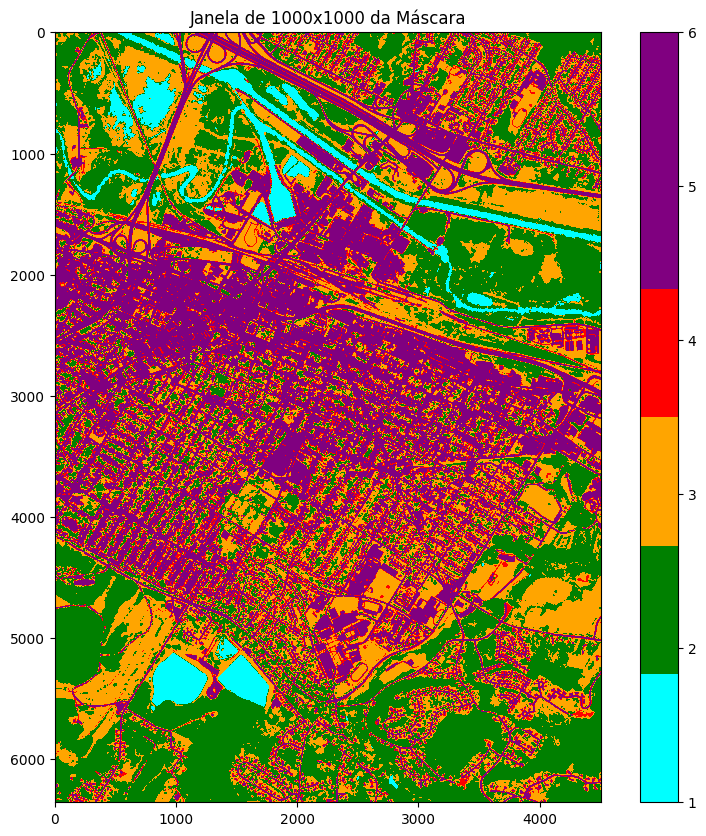

In [3]:
# Caminho do arquivo .tif
tif_path = '/scratch/dataset/chesapeake/ny_1m_2013_extended-debuffered-test_tiles/m_4307563_nw_18_1_lc.tif'
# Defina o tamanho da janela (1000x1000 pixels)
window_size = 100

# Abrindo o arquivo .tif com rasterio
with rasterio.open(tif_path) as src:
    # Dimensões da imagem original
    width, height = src.width, src.height
    
    # Escolha uma posição inicial (aqui pegamos o centro da imagem)
    x_center, y_center = width // 2, height // 2
    
    # Defina as coordenadas da janela
    window = Window(
        x_center - window_size // 2,
        y_center - window_size // 2,
        window_size,
        window_size
    )
    
    # Leia a janela da primeira banda
    mask_window = src.read(1)
    # mask_window = src.read(1, window=window)

    cores = ['cyan', 'green', 'orange', 'red', 'purple', 'purple']
    cmap = plt.cm.colors.ListedColormap(cores)

    # Plotando a máscara
    plt.figure(figsize=(10, 10))
    plt.imshow(mask_window, cmap=cmap)
    plt.colorbar()
    plt.title(f"Janela de 1000x1000 da Máscara")
    plt.show()

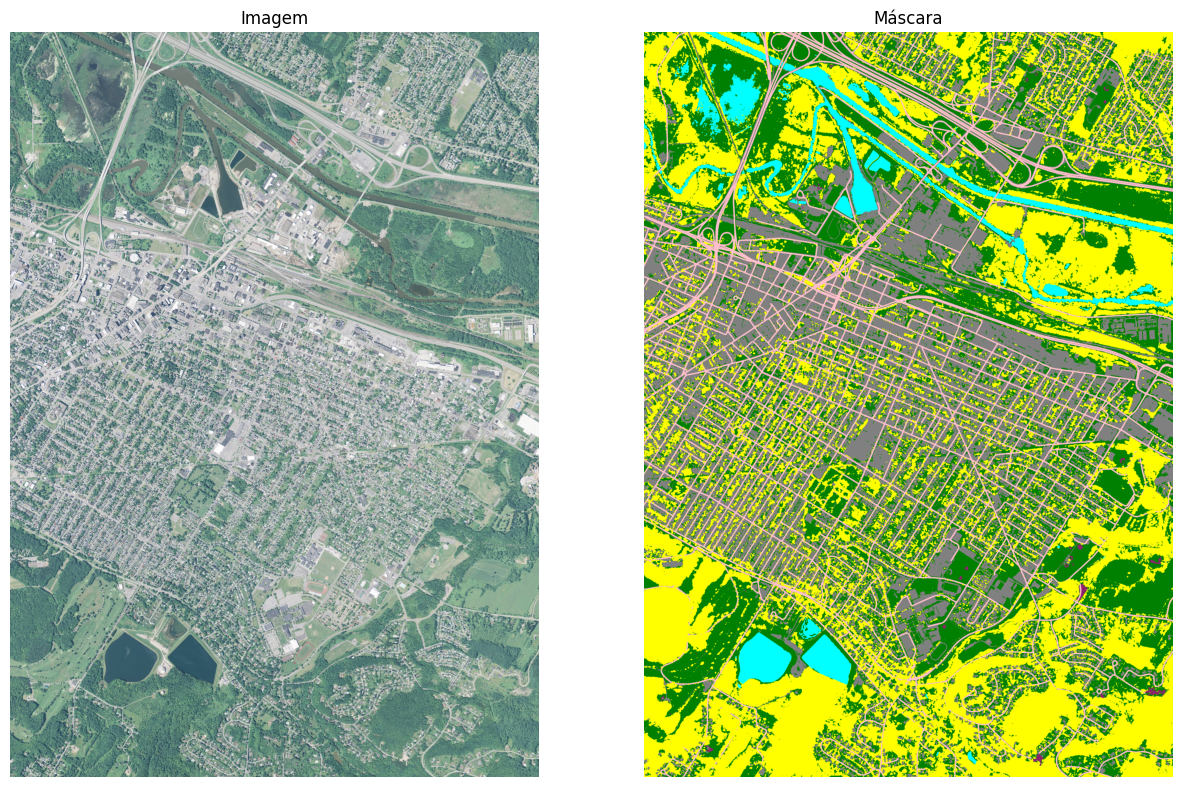

In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

def read_rgb_image(filepath):
    with rasterio.open(filepath) as src:
        red = src.read(1)
        green = src.read(2)
        blue = src.read(3)
        rgb = np.dstack((red, green, blue))
    return rgb


colors = [
    'whie',    # 0 - não existe
    'cyan',    # 1 - agua
    'yellow',  # 2 - floresta
    'green',   # 3 - campo
    'black',   # 4 - terra estéril
    'grey',    # 5 - impermeável (outro)
    'pink',    # 6 - impermeável (estrada)
    'black'    # 15 - sem dados
    # Adicione mais cores se tiver mais valores
]

mask_palette = {
    0: (0, 0, 0),        # não existe no dataset
    1: (0, 255, 255),    # agua
    2: (255, 255, 0),    # floresta
    3: (0, 128, 0),      # campo
    4: (142,35,107),     # terra estéril
    5: (128, 128, 128),  # impermeável (outro)
    6: (255, 192, 203),  # impermeável (estrada)
    15: (0, 0, 0)        # sem dados
}

# Cria um dicionário para mapear índices para cores RGB
index_to_color = {index: color for index, color in mask_palette.items()}

def convert_mask(np_mask):
    height, width, channels = np_mask.shape

    # Assume que o primeiro canal é o índice da classe
    class_channel = np_mask[:, :, 0]
    new_mask = np.zeros((height, width, 3), dtype=np.uint8)
    
    # Mapeia os valores do primeiro canal para cores
    for index, color in index_to_color.items():
        new_mask[class_channel == index] = color
    
    return new_mask

# Crie o colormap e o norm
cmap = ListedColormap(colors)
bounds = list(range(len(colors)))  # Se você tiver valores de 0 a 6, ajuste conforme necessário
norm = BoundaryNorm(bounds, cmap.N, clip=True)
img_path = ""
mask_path = ""
# Ler as duas imagens
base_path = "/scratch/dataset/chesapeake/ny_1m_2013_extended-debuffered-test_tiles/"
rgb_image = read_rgb_image(base_path + "m_4307563_nw_18_1_naip-new.tif")
mask_image = rasterio.open(base_path + "m_4307563_nw_18_1_lc.tif").read()
# print(np.unique(mask_image, return_counts=True))
mask_image = convert_mask(np.moveaxis(mask_image, 0, -1))
# Criar a figura e subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))

# Exibir a primeira imagem
ax1.imshow(rgb_image)
ax1.set_title('Imagem')
ax1.axis('off')

ax2.imshow(mask_image, cmap=cmap, norm=norm)
ax2.set_title('Máscara')
ax2.axis('off')

# Mostrar a figura com as duas imagens lado a lado
plt.show()

In [5]:
window_size = 2000

# Set para armazenar os valores únicos
unique_values = set()

# Abrindo o arquivo .tif com rasterio
with rasterio.open(tif_path) as src:
    width, height = src.width, src.height
    
    # Calcula o número total de janelas
    num_windows_x = (width + window_size - 1) // window_size
    num_windows_y = (height + window_size - 1) // window_size
    total_windows = num_windows_x * num_windows_y
    
    # Loop sobre a imagem, criando janelas de tamanho 1000x1000
    with tqdm(total=total_windows, desc="Processando Janelas") as pbar:
        for y in range(0, height, window_size):
            for x in range(0, width, window_size):
                # Certificando-se de que a janela não exceda os limites da imagem
                w = min(window_size, width - x)
                h = min(window_size, height - y)
                
                # Criando a janela
                window = Window(x, y, w, h)
                
                # Lendo os dados da janela
                data = src.read(1, window=window)
                
                # Obtendo valores únicos na janela e adicionando ao set
                unique_values.update(np.unique(data))
                
                # Atualizando a barra de progresso
                pbar.update(1)

# Exibindo os valores únicos encontrados
print(f"Valores únicos na imagem: {sorted(unique_values)}")

Processando Janelas: 100%|██████████| 12/12 [00:00<00:00, 58.79it/s]

Valores únicos na imagem: [1, 2, 3, 4, 5, 6]


In [6]:
# 12 - ny_1m_2013_extended-debuffered-train_tiles/m_4207746_nw_18_1_lc.tif;1200,1600

In [7]:
# https://www.kaggle.com/code/davidom/landcover-segmentation-via-cnn

In [8]:
import geopandas as gpd
import requests

In [9]:
index_url = 'https://lilawildlife.blob.core.windows.net/lila-wildlife/lcmcvpr2019/cvpr_chesapeake_landcover/spatial_index.geojson'
index_file_path = 'spatial_index.geojson'
with requests.get(index_url, stream=True) as response:
    assert response.status_code == 200
    with open(index_file_path, 'wb') as file:
        file.write(response.content)

In [10]:
gdf = gpd.read_file(index_file_path)

# The original dataframe 'split' column contains values like 'de-test', which specify 
# both state and the train/test/val split. Let's separate that into two columns: 
# 'state' and 'split'.
gdf.insert(1, 'state', gdf['split'].map(lambda s: s.split('-')[0]))
gdf['split'] = gdf['split'].map(lambda s: s.split('-')[1])
gdf.head(3)

,split,state,naip-new,naip-old,landsat-leaf-on,landsat-leaf-off,lc,nlcd,buildings,geometry
0,test,de,de_1m_2013_extended-debuffered-test_tiles/m_38...,de_1m_2013_extended-debuffered-test_tiles/m_38...,de_1m_2013_extended-debuffered-test_tiles/m_38...,de_1m_2013_extended-debuffered-test_tiles/m_38...,de_1m_2013_extended-debuffered-test_tiles/m_38...,de_1m_2013_extended-debuffered-test_tiles/m_38...,de_1m_2013_extended-debuffered-test_tiles/m_38...,"POLYGON ((-8398006.162 4659579.163, -8398045.2..."
1,test,de,de_1m_2013_extended-debuffered-test_tiles/m_39...,de_1m_2013_extended-debuffered-test_tiles/m_39...,de_1m_2013_extended-debuffered-test_tiles/m_39...,de_1m_2013_extended-debuffered-test_tiles/m_39...,de_1m_2013_extended-debuffered-test_tiles/m_39...,de_1m_2013_extended-debuffered-test_tiles/m_39...,de_1m_2013_extended-debuffered-test_tiles/m_39...,"POLYGON ((-8411911.566 4766920.138, -8411963.1..."
2,test,de,de_1m_2013_extended-debuffered-test_tiles/m_38...,de_1m_2013_extended-debuffered-test_tiles/m_38...,de_1m_2013_extended-debuffered-test_tiles/m_38...,de_1m_2013_extended-debuffered-test_tiles/m_38...,de_1m_2013_extended-debuffered-test_tiles/m_38...,de_1m_2013_extended-debuffered-test_tiles/m_38...,de_1m_2013_extended-debuffered-test_tiles/m_38...,"POLYGON ((-8391054.827 4686309.01, -8391088.55..."


In [11]:
for split_type in ['train', 'test', 'val']:
    samples_df = gdf[gdf["split"] == split_type] 
    print(f'Number of {split_type} tiles: {len(samples_df)}')
    for state in np.unique(samples_df['state']):
        print(f'  {state}: {len(samples_df[samples_df["state"] == state])}')

Number of train tiles: 582
  de: 82
  md: 100
  ny: 100
  pa: 100
  va: 100
  wv: 100
Number of test tiles: 120
  de: 20
  md: 20
  ny: 20
  pa: 20
  va: 20
  wv: 20
Number of val tiles: 30
  de: 5
  md: 5
  ny: 5
  pa: 5
  va: 5
  wv: 5


In [12]:
LABELS = {
    0: 'no data', # Note this val is 15 in raw dataset
    1: 'water',
    2: 'forest',
    3: 'field',
    4: 'barren land',
    5: 'impervious (other)',
    6: 'road',
}
num_labels = len(LABELS)

In [20]:
import os

LILA_BASE_URL = 'https://lilawildlife.blob.core.windows.net/lila-wildlife/lcmcvpr2019/cvpr_chesapeake_landcover'

def download_file(file_url):
    print(f'Downloading {file_url}')
    r = requests.get(file_url)
    r.raise_for_status()
    return r

def download_and_persist_file(file_url, file_path):
    """ Download the file from file_url and write it to the local
        storage at file_path. Create any required directories specified in 
        file_path.
    """
    if os.path.exists(file_path):
        return
    
    response = download_file(file_url)
    
    # Create any directories as necessary
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory, exist_ok=True)

    # Write downloaded file
    with open(file_path, 'wb') as file:
        for chunk in response.iter_content(chunk_size=8192):
            file.write(chunk)
                
def get_sample_pair(gdf, idx):
    """
    Get the NAIP image tile and accompanying label mask tile for the sample described by 
    the given row of the geodataframe, downloading them if they are not already persisted. 
    
    Return the local relative path of the image and label tiles.
    """
    img_path, label_path = gdf.loc[idx, ['naip-new', 'lc']]
    img_url = '/'.join([LILA_BASE_URL, img_path])
    label_url = '/'.join([LILA_BASE_URL, label_path])

    # print(img_path)
    
    img_write_path = f'/scratch/dataset/chesapeake/{img_path}'
    label_write_path = f'/scratch/dataset/chesapeake/{label_path}'
    
    if not os.path.exists(img_path):
        download_and_persist_file(img_url, img_write_path)
    if not os.path.exists(label_path):
        download_and_persist_file(label_url, label_write_path)
    
    return (img_write_path, label_write_path)

In [15]:
gdf.head(5)

,split,state,naip-new,naip-old,landsat-leaf-on,landsat-leaf-off,lc,nlcd,buildings,geometry
0,test,de,de_1m_2013_extended-debuffered-test_tiles/m_38...,de_1m_2013_extended-debuffered-test_tiles/m_38...,de_1m_2013_extended-debuffered-test_tiles/m_38...,de_1m_2013_extended-debuffered-test_tiles/m_38...,de_1m_2013_extended-debuffered-test_tiles/m_38...,de_1m_2013_extended-debuffered-test_tiles/m_38...,de_1m_2013_extended-debuffered-test_tiles/m_38...,"POLYGON ((-8398006.162 4659579.163, -8398045.2..."
1,test,de,de_1m_2013_extended-debuffered-test_tiles/m_39...,de_1m_2013_extended-debuffered-test_tiles/m_39...,de_1m_2013_extended-debuffered-test_tiles/m_39...,de_1m_2013_extended-debuffered-test_tiles/m_39...,de_1m_2013_extended-debuffered-test_tiles/m_39...,de_1m_2013_extended-debuffered-test_tiles/m_39...,de_1m_2013_extended-debuffered-test_tiles/m_39...,"POLYGON ((-8411911.566 4766920.138, -8411963.1..."
2,test,de,de_1m_2013_extended-debuffered-test_tiles/m_38...,de_1m_2013_extended-debuffered-test_tiles/m_38...,de_1m_2013_extended-debuffered-test_tiles/m_38...,de_1m_2013_extended-debuffered-test_tiles/m_38...,de_1m_2013_extended-debuffered-test_tiles/m_38...,de_1m_2013_extended-debuffered-test_tiles/m_38...,de_1m_2013_extended-debuffered-test_tiles/m_38...,"POLYGON ((-8391054.827 4686309.01, -8391088.55..."
3,test,de,de_1m_2013_extended-debuffered-test_tiles/m_38...,de_1m_2013_extended-debuffered-test_tiles/m_38...,de_1m_2013_extended-debuffered-test_tiles/m_38...,de_1m_2013_extended-debuffered-test_tiles/m_38...,de_1m_2013_extended-debuffered-test_tiles/m_38...,de_1m_2013_extended-debuffered-test_tiles/m_38...,de_1m_2013_extended-debuffered-test_tiles/m_38...,"POLYGON ((-8377150.872 4677391.122, -8377173.4..."
4,test,de,de_1m_2013_extended-debuffered-test_tiles/m_39...,de_1m_2013_extended-debuffered-test_tiles/m_39...,de_1m_2013_extended-debuffered-test_tiles/m_39...,de_1m_2013_extended-debuffered-test_tiles/m_39...,de_1m_2013_extended-debuffered-test_tiles/m_39...,de_1m_2013_extended-debuffered-test_tiles/m_39...,de_1m_2013_extended-debuffered-test_tiles/m_39...,"POLYGON ((-8418863.766 4757932.107, -8418920.9..."


In [21]:
ny_test_gdf = gdf[gdf["naip-new"].str.contains("m_3907527_se_18_1_", na=False)]

In [22]:
ny_test_gdf.head()

,split,state,naip-new,naip-old,landsat-leaf-on,landsat-leaf-off,lc,nlcd,buildings,geometry
9,test,de,de_1m_2013_extended-debuffered-test_tiles/m_39...,de_1m_2013_extended-debuffered-test_tiles/m_39...,de_1m_2013_extended-debuffered-test_tiles/m_39...,de_1m_2013_extended-debuffered-test_tiles/m_39...,de_1m_2013_extended-debuffered-test_tiles/m_39...,de_1m_2013_extended-debuffered-test_tiles/m_39...,de_1m_2013_extended-debuffered-test_tiles/m_39...,"POLYGON ((-8418863.738 4793934.289, -8418921.4..."


In [25]:
for index, _ in ny_test_gdf.iterrows():
    get_sample_pair(ny_test_gdf, index)

In [107]:
from collections import defaultdict

pasta = '/home/matheuspimenta/Jobs/SR/ifsl/fs-cs/test-tiles/masks'

# Função para calcular a distribuição de classes em porcentagem
def calcular_distribuicao_classes(arquivo):
    with rasterio.open(arquivo) as src:
        # Lê a primeira banda (assumindo que a máscara está na primeira banda)
        mask = src.read(1)
        # Calcula os valores únicos e suas contagens
        valores_unicos, contagens = np.unique(mask, return_counts=True)
        return valores_unicos, contagens

# Dicionário para acumular as contagens de todas as imagens
total_contagens = defaultdict(int)
total_pixels_geral = 0

# Itera sobre os arquivos na pasta
for arquivo in os.listdir(pasta):
    caminho_arquivo = os.path.join(pasta, arquivo)
    print(f"Analisando: {arquivo}")
    
    # Calcula a distribuição de classes para o arquivo atual
    valores, contagens = calcular_distribuicao_classes(caminho_arquivo)
    
    # Atualiza as contagens totais
    for valor, contagem in zip(valores, contagens):
        total_contagens[valor] += contagem
    total_pixels_geral += np.sum(contagens)
    
    # Exibe a distribuição de classes para o arquivo atual
    for valor, contagem in zip(valores, contagens):
        porcentagem = (contagem / np.sum(contagens)) * 100
        print(f"Classe {valor}: {porcentagem:.2f}%")
    print("-" * 30)

# Após iterar por todos os arquivos, calcula e exibe a distribuição total
print("Distribuição total (todas as imagens):")
for valor, contagem_total in total_contagens.items():
    porcentagem_total = (contagem_total / total_pixels_geral) * 100
    print(f"Classe {valor}: {porcentagem_total:.2f}%")

Analisando: m_3707759_nw_18_1_lc.tif
Classe 1: 1.02%
Classe 2: 80.06%
Classe 3: 17.43%
Classe 5: 0.72%
Classe 6: 0.78%
------------------------------
Analisando: m_3707847_ne_17_1_lc.tif
Classe 1: 0.44%
Classe 2: 85.56%
Classe 3: 13.18%
Classe 5: 0.31%
Classe 6: 0.51%
------------------------------
Analisando: m_3807826_sw_17_1_lc.tif
Classe 1: 0.12%
Classe 2: 23.37%
Classe 3: 70.26%
Classe 4: 1.53%
Classe 5: 2.82%
Classe 6: 1.90%
------------------------------
Analisando: m_3907863_se_17_1_lc.tif
Classe 1: 1.49%
Classe 2: 43.51%
Classe 3: 50.21%
Classe 4: 0.25%
Classe 5: 2.83%
Classe 6: 1.72%
------------------------------
Analisando: m_3707864_nw_17_1_lc.tif
Classe 1: 0.89%
Classe 2: 76.64%
Classe 3: 21.37%
Classe 5: 0.53%
Classe 6: 0.58%
------------------------------
Analisando: m_3807660_ne_18_1_lc.tif
Classe 1: 88.96%
Classe 2: 7.28%
Classe 3: 3.57%
Classe 4: 0.05%
Classe 5: 0.05%
Classe 6: 0.10%
------------------------------
Analisando: m_3807821_ne_17_1_lc.tif
Classe 1: 0.29%


In [31]:
#  Escolha final de pool de querys
#  DE - m_3907527_se_18_1_lc -> 2% terra
#  NY - m_4307563_nw_18_1_lc -> mais bem distribuido de NY

tiles_path = [
    "/scratch/dataset/chesapeake/ny_1m_2013_extended-debuffered-test_tiles/m_4307563_nw_18_1_lc.tif",
    "/scratch/dataset/chesapeake/de_1m_2013_extended-debuffered-test_tiles/m_3907527_se_18_1_lc.tif"
]
for tile in tiles_path:
    mask_rast = rasterio.open(tile)

    width = mask_rast.width
    height = mask_rast.height

    for i in range(0, width-400, 400):
        for j in range(0, height-400, 400):
            with open("/home/matheuspimenta/Jobs/SR/ifsl/utils/querys.txt", 'a') as file:
                file.write(tile.replace(
                    '/scratch/dataset/chesapeake/', ''
                ) + ";" + str(i) + "," + str(j)+"\n")
